<a href="https://colab.research.google.com/github/razomadeleine3-maker/APP_Alzheimer_y_apoyo/blob/main/mi_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNIVERSIDAD NACIONAL DE CHIMBORAZO**
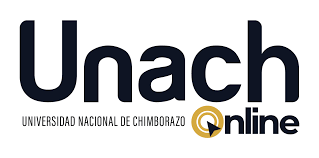

**Por: Madeleine Razo**

**Primer Semestre "C" **

**Fundamentos de Metodología de la investigación**

In [ ]:
// Importar librerías necesarias
import android.content.Context
import android.util.Log
import com.google.firebase.database.FirebaseDatabase

// Clase principal del algoritmo
class AlzheimerAlgorithm(private val context: Context) {

    companion object {
        private const val TAG = "AlzheimerAlgorithm"
    }

    // Variables para almacenar los datos del paciente
    private var paciente: Paciente? = null
    private val sintomas: MutableList<Sintoma> = mutableListOf()
    private val medicacion: MutableList<Medicacion> = mutableListOf()

    // Función para registrar al paciente
    fun registrarPaciente(paciente: Paciente) {
        this.paciente = paciente

        FirebaseDatabase.getInstance()
            .reference
            .child("pacientes")
            .child(paciente.id)
            .setValue(paciente)
            .addOnSuccessListener {
                Log.d(TAG, "Paciente registrado correctamente")
            }
            .addOnFailureListener { e ->
                Log.e(TAG, "Error al registrar paciente", e)
            }
    }

    // Función para evaluar el estado cognitivo del paciente
    fun evaluarEstadoCognitivo() {
        if (paciente == null) {
            Log.e(TAG, "No se puede evaluar: paciente no registrado")
            return
        }

        val mmse = MMSE()
        val resultados = mmse.aplicarEscala(paciente!!)

        sintomas.clear()
        sintomas.addAll(resultados)

        FirebaseDatabase.getInstance()
            .reference
            .child("sintomas")
            .child(paciente!!.id)
            .setValue(sintomas)
            .addOnSuccessListener {
                Log.d(TAG, "Evaluación cognitiva guardada")
            }
            .addOnFailureListener { e ->
                Log.e(TAG, "Error al guardar evaluación", e)
            }
    }

    // Función para registrar los síntomas diarios del paciente
    fun registrarSintoma(sintoma: Sintoma) {
        if (paciente == null) {
            Log.e(TAG, "No se puede registrar síntoma: paciente no registrado")
            return
        }

        sintomas.add(sintoma)

        FirebaseDatabase.getInstance()
            .reference
            .child("sintomas")
            .child(paciente!!.id)
            .child(sintoma.id)
            .setValue(sintoma)
            .addOnSuccessListener {
                Log.d(TAG, "Síntoma registrado correctamente")
            }
            .addOnFailureListener { e ->
                Log.e(TAG, "Error al registrar síntoma", e)
            }
    }

    // Función para analizar los datos y proporcionar recomendaciones
    fun analizarDatos() {
        if (paciente == null) {
            Log.e(TAG, "No se puede analizar: paciente no registrado")
            return
        }

        val analisis = Analisis(sintomas, medicacion)
        val recomendaciones = analisis.proporcionarRecomendaciones()

        FirebaseDatabase.getInstance()
            .reference
            .child("recomendaciones")
            .child(paciente!!.id)
            .setValue(recomendaciones)
            .addOnSuccessListener {
                Log.d(TAG, "Recomendaciones guardadas correctamente")
            }
            .addOnFailureListener { e ->
                Log.e(TAG, "Error al guardar recomendaciones", e)
            }
    }
}